# 1. Daten

In [105]:
# Exp 2ml: G actin
# Values checked

import pandas as pd

Zeit_t0_Messreihe1_min = [5, 10, 15, 20, 30, 40, 50, 60, 70]
Rollzeit_tM_Messreihe1_s = [7.35, 42.38, 23.28, 23.27, 30.57, 28.85, 25.49, 29.1, 31.0]
Strecke_s_Messreihe1_cm = [7, 1, 1, 1, 1.6, 1, 1, 1, 1]

Zeit_t0_Messreihe2_min = [5, 10, 15, 20, 30, 40, 50, 60, 70]
Rollzeit_tM_Messreihe2_s = [2.6, 13, 40.7, 23.0, 150, 52, 83, 29.45, 61]
Strecke_s_Messreihe2_cm = [7, 1, 1, 1, 1, 1, 1, 1, 1]

Winkel_phi_Messreihe_deg = [30, 30, 45, 45, 60, 75, 75, 75, 75]

In [106]:
# Fehlerrechnung
Zeit_t0_Messreihe1_Fehler_min = []
Rollzeit_tM_Messreihe1_Fehler_s = []
Strecke_s_Messreihe1_Fehler_cm = []

Zeit_t0_Messreihe2_Fehler_min = []
Rollzeit_tM_Messreihe2_Fehler_s = []
Strecke_s_Messreihe2_Fehler_cm = []

Winkel_phi_Messreihe_Fehler_deg = [1, 1, 1, 1, 1, 1, 1, 1, 1]


In [107]:
import pandas as pd
import numpy as np

df_raw = pd.DataFrame({
    "Zeit_t0_Messreihe1_min": Zeit_t0_Messreihe1_min,
    "Rollzeit_tM_Messreihe1_s": Rollzeit_tM_Messreihe1_s,
    "Strecke_s_Messreihe1_cm": Strecke_s_Messreihe1_cm,
    "Zeit_t0_Messreihe2_min": Zeit_t0_Messreihe2_min,
    "Rollzeit_tM_Messreihe2_s": Rollzeit_tM_Messreihe2_s,
    "Strecke_s_Messreihe2_cm": Strecke_s_Messreihe2_cm,
    "Winkel_phi_Messreihe1_deg": Winkel_phi_Messreihe_deg,
})

print(df_raw)

   Zeit_t0_Messreihe1_min  Rollzeit_tM_Messreihe1_s  Strecke_s_Messreihe1_cm  \
0                       5                      7.35                      7.0   
1                      10                     42.38                      1.0   
2                      15                     23.28                      1.0   
3                      20                     23.27                      1.0   
4                      30                     30.57                      1.6   
5                      40                     28.85                      1.0   
6                      50                     25.49                      1.0   
7                      60                     29.10                      1.0   
8                      70                     31.00                      1.0   

   Zeit_t0_Messreihe2_min  Rollzeit_tM_Messreihe2_s  Strecke_s_Messreihe2_cm  \
0                       5                      2.60                        7   
1                      10              

# 2. Fehlerberechnung + (Ausreißer?)

In [108]:
# 2.1 Fehler der Strecke berechnen
import math
from typing import Union

Number = Union[int, float]

def streckenunsicherheit(b: Number) -> float:
    """
    Berechnet die Typ-B-Standardunsicherheit der Strecke bei Rechteckverteilung.

    Annahme:
      - b ist die geschätzte maximale Abweichung (±b) der Strecke (gleiche Einheit wie die Strecke).
      - Rechteckverteilung => u(s) = b / sqrt(3)

    Parameter
    ----------
    b : int | float
        Maximale Abweichung (±b), z.B. b=0.2 für ±0.2 mm.

    Returns
    -------
    float
        Standardunsicherheit u(s) in derselben Einheit wie b.
    """
    if b < 0:
        raise ValueError("b muss >= 0 sein (maximale Abweichung als Betrag).")
    return b/ math.sqrt(3)

b = 0.2  # cm (entspricht ±0.2 mm)
strecken_error_cm = streckenunsicherheit(b)
print(f"strecken_error_cm: {strecken_error_cm} cm")

Strecke_s_Messreihe1_Fehler_cm = [strecken_error_cm] * 9
Strecke_s_Messreihe2_Fehler_cm = [strecken_error_cm] * 9
print("Strecke_s_Messreihe1_Fehler_cm:", Strecke_s_Messreihe1_Fehler_cm)
print("Strecke_s_Messreihe2_Fehler_cm:", Strecke_s_Messreihe2_Fehler_cm)

strecken_error_cm: 0.11547005383792516 cm
Strecke_s_Messreihe1_Fehler_cm: [0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516]
Strecke_s_Messreihe2_Fehler_cm: [0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516]


In [109]:
# 2.2 Fehler der Rollzeit berechnen
import math

def rollzeitunsicherheit(a_s: float) -> float:
    """
    Berechnet die Typ-B-Standardunsicherheit der Rollzeit bei manueller Stopuhrmessung.

    Annahmen:
    - a_s: maximale Abweichung (±a) der Reaktionszeit pro Klick in Sekunden
    - Zwei unabhängige Klicks: Start und Stop
    - Rechteckverteilung pro Klick

    Formel:
    u(t_M) = sqrt(2) * a / sqrt(3)

    Rückgabe:
    - Unsicherheit in Sekunden
    """
    if a_s < 0:
        raise ValueError("a muss positiv sein.")
    return math.sqrt(2) * a_s / math.sqrt(3)

a = 1  # Sekunden (±1 s Reaktionszeit pro Klick)

u_t = rollzeitunsicherheit(a)
print("Rollzeit-Unsicherheit u(t_M):")
print(f"u(t_M) = {u_t:.4f} s")

Rollzeit_tM_Messreihe1_Fehler_s = [u_t] * 9
Rollzeit_tM_Messreihe2_Fehler_s = [u_t] * 9
print("Rollzeit_tM_Messreihe1_Fehler_s:", Rollzeit_tM_Messreihe1_Fehler_s)
print("Rollzeit_tM_Messreihe2_Fehler_s:", Rollzeit_tM_Messreihe2_Fehler_s)

Rollzeit-Unsicherheit u(t_M):
u(t_M) = 0.8165 s
Rollzeit_tM_Messreihe1_Fehler_s: [0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261]
Rollzeit_tM_Messreihe2_Fehler_s: [0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261]


In [110]:
# 2.3 Fehler des Winkel berechnen
import math

def winkelunsicherheit_typ_b(c_deg: float) -> float:
    """
    Typ-B-Standardunsicherheit eines Winkels bei Rechteckverteilung.
    c_deg: maximale Abweichung in Grad (z.B. 1 für ±1°)

    Rückgabe:
    - Unsicherheit in Radiant
    """
    c_rad = math.radians(c_deg)
    return c_rad / math.sqrt(3)


# Beispiel:
u_phi = winkelunsicherheit_typ_b(1.0)
print(u_phi)  # ≈ 0.0101 rad

import math

def rad2deg(x_rad: float) -> float:
    return x_rad * 180.0 / math.pi

def deg2rad(x_deg: float) -> float:
    return x_deg * math.pi / 180.0


# Beispiel:
u_phi_rad = 0.0101
print(f"rad2deg(u_phi_rad): {rad2deg(u_phi_rad)}°")  # ≈ 0.579°

Winkel_phi_Messreihe_Fehler_deg = [rad2deg(u_phi)] * 9
print("Winkel_phi_Messreihe1_Fehler_deg:", Winkel_phi_Messreihe_Fehler_deg)    

Winkel_phi_Messreihe_Fehler_rad = [u_phi] * 9
print("Winkel_phi_Messreihe2_Fehler_rad:", Winkel_phi_Messreihe_Fehler_rad)



0.010076663134634544
rad2deg(u_phi_rad): 0.5786873730821314°
Winkel_phi_Messreihe1_Fehler_deg: [0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258]
Winkel_phi_Messreihe2_Fehler_rad: [0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544]


In [111]:
# 2.4 Zeitmessfehler 
Zeit_t0_Messreihe1_Fehler_min = [0.5] * 9
print("Zeit_t0_Messreihe1_Fehler_min:", Zeit_t0_Messreihe1_Fehler_min)
Zeit_t0_Messreihe2_Fehler_min = [0.5] * 9
print("Zeit_t0_Messreihe2_Fehler_min:", Zeit_t0_Messreihe2_Fehler_min)

Zeit_t0_Messreihe1_Fehler_min: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Zeit_t0_Messreihe2_Fehler_min: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [112]:
cols = {
    "Zeit_t0_Messreihe1_min": Zeit_t0_Messreihe1_min,
    "Zeit_t0_Messreihe1_Fehler_min": Zeit_t0_Messreihe1_Fehler_min,
    "Rollzeit_tM_Messreihe1_s": Rollzeit_tM_Messreihe1_s,
    "Rollzeit_tM_Messreihe1_Fehler_s": Rollzeit_tM_Messreihe1_Fehler_s,
    "Strecke_s_Messreihe1_cm": Strecke_s_Messreihe1_cm,
    "Strecke_s_Messreihe1_Fehler_cm": Strecke_s_Messreihe1_Fehler_cm,
    "Zeit_t0_Messreihe2_min": Zeit_t0_Messreihe2_min,
    "Zeit_t0_Messreihe2_Fehler_min": Zeit_t0_Messreihe2_Fehler_min,
    "Rollzeit_tM_Messreihe2_s": Rollzeit_tM_Messreihe2_s,
    "Rollzeit_tM_Messreihe2_Fehler_s": Rollzeit_tM_Messreihe2_Fehler_s,
    "Strecke_s_Messreihe2_cm": Strecke_s_Messreihe2_cm,
    "Strecke_s_Messreihe2_Fehler_cm": Strecke_s_Messreihe2_Fehler_cm,
    "Winkel_phi_Messreihe_Fehler_deg": Winkel_phi_Messreihe_Fehler_deg,
    "Winkel_phi_Messreihe_Fehler_rad": Winkel_phi_Messreihe_Fehler_rad,
}

for k, v in cols.items():
    try:
        print(f"{k:35s} len={len(v)}")
    except TypeError:
        print(f"{k:35s} ist kein Array/Listentyp (Typ: {type(v)})")


Zeit_t0_Messreihe1_min              len=9
Zeit_t0_Messreihe1_Fehler_min       len=9
Rollzeit_tM_Messreihe1_s            len=9
Rollzeit_tM_Messreihe1_Fehler_s     len=9
Strecke_s_Messreihe1_cm             len=9
Strecke_s_Messreihe1_Fehler_cm      len=9
Zeit_t0_Messreihe2_min              len=9
Zeit_t0_Messreihe2_Fehler_min       len=9
Rollzeit_tM_Messreihe2_s            len=9
Rollzeit_tM_Messreihe2_Fehler_s     len=9
Strecke_s_Messreihe2_cm             len=9
Strecke_s_Messreihe2_Fehler_cm      len=9
Winkel_phi_Messreihe_Fehler_deg     len=9
Winkel_phi_Messreihe_Fehler_rad     len=9


In [113]:
df = pd.DataFrame({
    "Zeit_t0_Messreihe1_min": Zeit_t0_Messreihe1_min,
    "Zeit_t0_Messreihe1_Fehler_min": Zeit_t0_Messreihe1_Fehler_min,
    "Rollzeit_tM_Messreihe1_s": Rollzeit_tM_Messreihe1_s,
    "Rollzeit_tM_Messreihe1_Fehler_s": Rollzeit_tM_Messreihe1_Fehler_s,
    "Strecke_s_Messreihe1_cm": Strecke_s_Messreihe1_cm,
    "Strecke_s_Messreihe1_Fehler_cm": Strecke_s_Messreihe1_Fehler_cm,
    "Zeit_t0_Messreihe2_min": Zeit_t0_Messreihe2_min,
    "Zeit_t0_Messreihe2_Fehler_min": Zeit_t0_Messreihe2_Fehler_min,
    "Rollzeit_tM_Messreihe2_s": Rollzeit_tM_Messreihe2_s,
    "Rollzeit_tM_Messreihe2_Fehler_s": Rollzeit_tM_Messreihe2_Fehler_s,
    "Strecke_s_Messreihe2_cm": Strecke_s_Messreihe2_cm,
    "Strecke_s_Messreihe2_Fehler_cm": Strecke_s_Messreihe2_Fehler_cm,
    "Winkel_phi_Messreihe_deg": Winkel_phi_Messreihe_deg,
    "Winkel_phi_Messreihe_Fehler_deg": Winkel_phi_Messreihe_Fehler_deg,
    "Winkel_phi_Messreihe_Fehler_rad": Winkel_phi_Messreihe_Fehler_rad,
})


print(df)

   Zeit_t0_Messreihe1_min  Zeit_t0_Messreihe1_Fehler_min  \
0                       5                            0.5   
1                      10                            0.5   
2                      15                            0.5   
3                      20                            0.5   
4                      30                            0.5   
5                      40                            0.5   
6                      50                            0.5   
7                      60                            0.5   
8                      70                            0.5   

   Rollzeit_tM_Messreihe1_s  Rollzeit_tM_Messreihe1_Fehler_s  \
0                      7.35                         0.816497   
1                     42.38                         0.816497   
2                     23.28                         0.816497   
3                     23.27                         0.816497   
4                     30.57                         0.816497   
5              

# 3. Geschwindigkeit u

In [114]:
# 3.1 u
df["u1_cm_s"] = df["Strecke_s_Messreihe1_cm"] / df["Rollzeit_tM_Messreihe1_s"]
df["u2_cm_s"] = df["Strecke_s_Messreihe2_cm"] / df["Rollzeit_tM_Messreihe2_s"]
print(df)

   Zeit_t0_Messreihe1_min  Zeit_t0_Messreihe1_Fehler_min  \
0                       5                            0.5   
1                      10                            0.5   
2                      15                            0.5   
3                      20                            0.5   
4                      30                            0.5   
5                      40                            0.5   
6                      50                            0.5   
7                      60                            0.5   
8                      70                            0.5   

   Rollzeit_tM_Messreihe1_s  Rollzeit_tM_Messreihe1_Fehler_s  \
0                      7.35                         0.816497   
1                     42.38                         0.816497   
2                     23.28                         0.816497   
3                     23.27                         0.816497   
4                     30.57                         0.816497   
5              

In [115]:
# 3.2 Fehler von u berechnen
def geschw_unsicherheit(s, t, us, ut):
    return np.sqrt( (us / t)**2 + (s * ut / t**2)**2 )

df["u1_Fehler_cm_s"] = geschw_unsicherheit(
    df["Strecke_s_Messreihe1_cm"],
    df["Rollzeit_tM_Messreihe1_s"],
    df["Strecke_s_Messreihe1_Fehler_cm"],
    df["Rollzeit_tM_Messreihe1_Fehler_s"],
)

df["u2_Fehler_cm_s"] = geschw_unsicherheit(
    df["Strecke_s_Messreihe2_cm"],
    df["Rollzeit_tM_Messreihe2_s"],
    df["Strecke_s_Messreihe2_Fehler_cm"],
    df["Rollzeit_tM_Messreihe2_Fehler_s"],
)
print (df)

   Zeit_t0_Messreihe1_min  Zeit_t0_Messreihe1_Fehler_min  \
0                       5                            0.5   
1                      10                            0.5   
2                      15                            0.5   
3                      20                            0.5   
4                      30                            0.5   
5                      40                            0.5   
6                      50                            0.5   
7                      60                            0.5   
8                      70                            0.5   

   Rollzeit_tM_Messreihe1_s  Rollzeit_tM_Messreihe1_Fehler_s  \
0                      7.35                         0.816497   
1                     42.38                         0.816497   
2                     23.28                         0.816497   
3                     23.27                         0.816497   
4                     30.57                         0.816497   
5              

In [116]:
# 3.3 Gemittelte Geschwindigkeit
df["u_mittel_cm_s"] = 0.5 * (df["u1_cm_s"] + df["u2_cm_s"])


In [117]:
# 3.4 Fehler der gemittelten Geschwindigkeit
df["u_mittel_Fehler_cm_s"] = 0.5 * np.sqrt(
    df["u1_Fehler_cm_s"]**2 + df["u2_Fehler_cm_s"]**2
)
print(df)

   Zeit_t0_Messreihe1_min  Zeit_t0_Messreihe1_Fehler_min  \
0                       5                            0.5   
1                      10                            0.5   
2                      15                            0.5   
3                      20                            0.5   
4                      30                            0.5   
5                      40                            0.5   
6                      50                            0.5   
7                      60                            0.5   
8                      70                            0.5   

   Rollzeit_tM_Messreihe1_s  Rollzeit_tM_Messreihe1_Fehler_s  \
0                      7.35                         0.816497   
1                     42.38                         0.816497   
2                     23.28                         0.816497   
3                     23.27                         0.816497   
4                     30.57                         0.816497   
5              

In [118]:
df[[
    "Zeit_t0_Messreihe1_min",
    "u1_cm_s", "u1_Fehler_cm_s",
    "u2_cm_s", "u2_Fehler_cm_s",
    "u_mittel_cm_s", "u_mittel_Fehler_cm_s"
]]


,Zeit_t0_Messreihe1_min,u1_cm_s,u1_Fehler_cm_s,u2_cm_s,u2_Fehler_cm_s,u_mittel_cm_s,u_mittel_Fehler_cm_s
0,5,0.952381,0.106958,2.692308,0.846650,1.822344,0.426690
1,10,0.023596,0.002762,0.076923,0.010111,0.050260,0.005241
2,15,0.042955,0.005184,0.024570,0.002880,0.033763,0.002965
3,20,0.042974,0.005186,0.043478,0.005252,0.043226,0.003691
4,30,0.052339,0.004028,0.006667,0.000771,0.029503,0.002050
5,40,0.034662,0.004121,0.019231,0.002241,0.026946,0.002345
6,50,0.039231,0.004701,0.012048,0.001396,0.025640,0.002452
7,60,0.034364,0.004084,0.033956,0.004032,0.034160,0.002869
8,70,0.032258,0.003821,0.016393,0.001906,0.024326,0.002135


# 4. Viskosität

In [119]:
# # Konstanten -> siehe poly1!
# K = 0.000583           # Korrekturfaktor
# d_kugel_cm = 0.06       # cm

# g = 9.81 * 100            # cm/s^2
# roh_water = 1          # g/cm^3
# roh_kugel = 7.85       # g/cm^3 (aus Skript)

In [120]:
# import math
# # Durchmesser Kapillare
# # Rechnung - Volumen = 100µl -> *10^-6 -> 100l -> *10^3 -> cm^3 
# # Formel: V = π r^2 * h (G = Grundfläche Kreis und h = Höhe)
# V = 100 # µl = 0.001 cm^3
# V = V * 0.001 # cm^3
# h = 9 # cm

# r_kapillare_cm = math.sqrt(V/(math.pi * h))
# print(f"Radius {r_kapillare_cm} cm")
        
# d_kapillare_cm = r_kapillare_cm*2
# print(f"Durchmesser {d_kapillare_cm} cm")


In [121]:
# # 4.1 Viskositätsformel
# import math

# def viscosity_formula(K: float, roh_fluid: float, roh_shape: float,
#                       angle: float, d_tube: float, d_shape: float,
#                       g: float, velocity: float):
    
#     numerator = (5 * math.pi / 42) * K * (d_shape ** 2) * roh_fluid * g * math.sin(math.radians(angle))
#     correction = (roh_shape - roh_fluid) / roh_fluid * (d_tube + d_shape) / d_shape
    
#     viscosity = numerator * correction / velocity
#     return viscosity * 100

In [122]:
import math

def viscosity_formula_4_1(
    K: float,               # Korrekturfaktor
    roh_fluid: float,       # g/cm^3
    roh_kugel: float,       # g/cm^3
    phi_deg: float,         # Grad
    d_kapillare_cm: float,  # cm
    d_kugel_cm: float,      # cm
    g_cm_s2: float,         # cm/s^2
    velocity_cm_s: float    # cm/s
) -> float:
    """
    Formel 4.1 in cgs-Einheiten (cm, s, g).
    Rückgabe: Viskosität in mPa*s.
    """
    if velocity_cm_s <= 0:
        raise ValueError("velocity_cm_s muss > 0 sein.")

    phi_rad = math.radians(phi_deg)

    # entspricht deinem 'numerator'
    prefactor = (5.0 * math.pi / 42.0) * K
    numerator = prefactor * (d_kugel_cm ** 2) * roh_fluid * g_cm_s2 * math.sin(phi_rad)

    # entspricht deinem 'correction'
    correction = ((roh_kugel - roh_fluid) / roh_fluid) * ((d_kapillare_cm + d_kugel_cm) / d_kugel_cm)

    # Viskosität in Poise (g/(cm*s))
    eta_poise = (numerator * correction) / velocity_cm_s

    # 1 Poise = 0.1 Pa*s = 100 mPa*s
    eta_mPa_s = eta_poise * 100.0
    return eta_mPa_s


In [123]:
def constant_C_cgs(
    K: float,
    roh_fluid: float,
    roh_kugel: float,
    d_kapillare_cm: float,
    d_kugel_cm: float,
    g_cm_s2: float
) -> float:
    """
    C so, dass gilt: eta_poise = (C * sin(phi)) / u   (u in cm/s, phi in rad)
    Rückgabe: C in (Poise * cm/s) = g/(cm*s) * cm/s = g/cm
    """
    prefactor = (5.0 * math.pi / 42.0) * K
    correction = ((roh_kugel - roh_fluid) / roh_fluid) * ((d_kapillare_cm + d_kugel_cm) / d_kugel_cm)
    C = prefactor * (d_kugel_cm ** 2) * roh_fluid * g_cm_s2 * correction
    return C


In [124]:
# Konstanten aus deinem Screenshot
K = 0.000583
d_kugel_cm = 0.06
g_cm_s2 = 9.81 * 100
roh_water = 1.0
roh_kugel = 7.85

# d_kapillare_cm aus deiner Rechnung (hier als Beispielwert einsetzen)
d_kapillare_cm = 0.11894160774351809

# eta (mPa*s) aus gemittelter Geschwindigkeit
df["eta_mPa_s"] = df.apply(
    lambda r: viscosity_formula_4_1(
        K=K,
        roh_fluid=roh_water,
        roh_kugel=roh_kugel,
        phi_deg=r["Winkel_phi_Messreihe_deg"],
        d_kapillare_cm=d_kapillare_cm,
        d_kugel_cm=d_kugel_cm,
        g_cm_s2=g_cm_s2,
        velocity_cm_s=r["u_mittel_cm_s"],
    ),
    axis=1
)


In [125]:
# 4.2 Viskositätsfehlerberechnung
import numpy as np

def eta_uncertainty_from_C(u_bar, du_bar, phi_deg, dphi_deg, C):
    phi = np.deg2rad(phi_deg)
    dphi = np.deg2rad(dphi_deg)

    term_phi = (C * np.cos(phi) / u_bar * dphi) ** 2
    term_u   = (C * np.sin(phi) / (u_bar**2) * du_bar) ** 2

    # Ergebnis in Poise; danach in mPa*s
    d_eta_poise = np.sqrt(term_phi + term_u)
    return d_eta_poise * 100.0

C = constant_C_cgs(K, roh_water, roh_kugel, d_kapillare_cm, d_kugel_cm, g_cm_s2)

df["eta_Fehler_mPa_s"] = eta_uncertainty_from_C(
    df["u_mittel_cm_s"].to_numpy(),
    df["u_mittel_Fehler_cm_s"].to_numpy(),
    df["Winkel_phi_Messreihe_deg"].to_numpy(),
    df["Winkel_phi_Messreihe_Fehler_deg"].to_numpy(),
    C
)


In [126]:
df[[
    "Zeit_t0_Messreihe1_min",
    "u_mittel_cm_s", "u_mittel_Fehler_cm_s",
    "eta_mPa_s", "eta_Fehler_mPa_s",

]]

,Zeit_t0_Messreihe1_min,u_mittel_cm_s,u_mittel_Fehler_cm_s,eta_mPa_s,eta_Fehler_mPa_s
0,5,1.822344,0.426690,0.431619,0.101341
1,10,0.050260,0.005241,15.649939,1.654621
2,15,0.033763,0.002965,32.946513,2.912273
3,20,0.043226,0.003691,25.733628,2.212402
4,30,0.029503,0.002050,46.177348,3.220391
5,40,0.026946,0.002345,56.390275,4.910573
6,50,0.025640,0.002452,59.264319,5.669952
7,60,0.034160,0.002869,44.482221,3.738425
8,70,0.024326,0.002135,62.465293,5.484212


In [127]:
print(df)

   Zeit_t0_Messreihe1_min  Zeit_t0_Messreihe1_Fehler_min  \
0                       5                            0.5   
1                      10                            0.5   
2                      15                            0.5   
3                      20                            0.5   
4                      30                            0.5   
5                      40                            0.5   
6                      50                            0.5   
7                      60                            0.5   
8                      70                            0.5   

   Rollzeit_tM_Messreihe1_s  Rollzeit_tM_Messreihe1_Fehler_s  \
0                      7.35                         0.816497   
1                     42.38                         0.816497   
2                     23.28                         0.816497   
3                     23.27                         0.816497   
4                     30.57                         0.816497   
5              

# 5. Plotting & sigmoidal fit 

Einheiten! x-y
...

Fitgüte
Wendepunkt

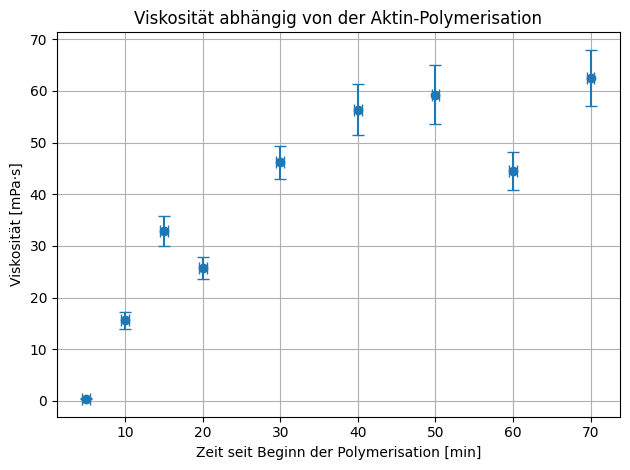

In [128]:
import matplotlib.pyplot as plt

x = df["Zeit_t0_Messreihe1_min"]
xerr = df["Zeit_t0_Messreihe1_Fehler_min"]
y = df["eta_mPa_s"]
yerr = df["eta_Fehler_mPa_s"]

plt.figure()
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', capsize=4)
plt.xlabel("Zeit seit Beginn der Polymerisation [min]")
plt.ylabel("Viskosität [mPa·s]")
plt.title("Viskosität abhängig von der Aktin-Polymerisation")
plt.grid(True)
plt.tight_layout()
plt.show()


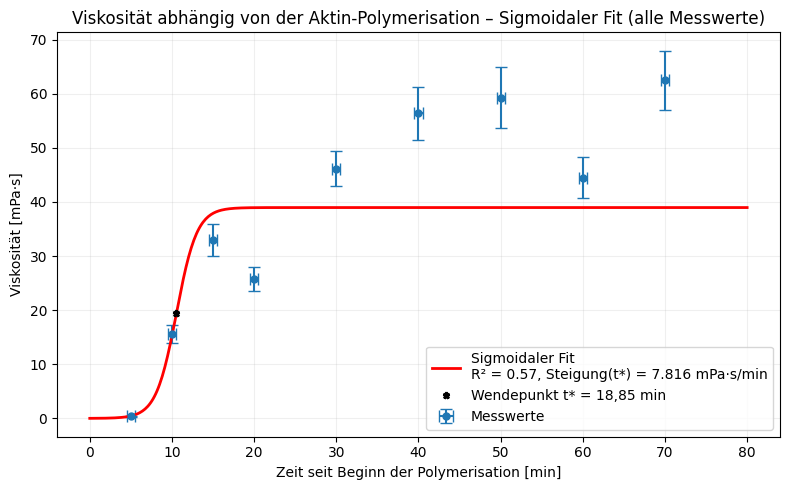


---- Fit-Parameter ----
A   = 0.0000
B   = 38.9641
k   = 0.8023 1/min
t*  = 10.55 min

---- Abgeleitete Größen ----
Steigung bei t* = 7.8155 mPa·s/min

---- Fit-Qualität ----
R²         = 0.5676
RMSE       = 13.1223 mPa·s
Chi²_red   = 17.9203


(array([2.06418111e-34, 3.89640851e+01, 8.02329395e-01, 1.05509483e+01]),
 10.550948252551592,
 7.815507712158247)

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sigmoid-Funktion -------------------------------------------------------------
def sigmoid(t, A, B, k, t0):
    return A + (B - A) / (1 + np.exp(-k * (t - t0)))

# Fit-Funktion -----------------------------------------------------------------
def fit_and_plot(df, title="Sigmoidal Fit"):
    
    x = df["Zeit_t0_Messreihe1_min"]
    y = df["eta_mPa_s"]
    y_err = df["eta_Fehler_mPa_s"]
    x_err = df["Zeit_t0_Messreihe1_Fehler_min"]

    # Fehler dürfen nie 0 sein
    y_err = np.where(y_err == 0, 1e-6, y_err)

    # Startwerte
    A0 = np.min(y)
    B0 = np.max(y)
    k0 = 0.1
    t00 = np.median(x)
    p0 = [A0, B0, k0, t00]

    # Bounds
    lower_bounds = [0, 0, 0.0001, 0]
    upper_bounds = [10, 200, 1.0, 100]


    # Fit ----------------------------------------------------------------------
    params, cov = curve_fit(
        sigmoid,
        x, y,
        p0=p0,
        bounds=(lower_bounds, upper_bounds),
        sigma=y_err,
        absolute_sigma=True,
        maxfev=20000
    )

    A_fit, B_fit, k_fit, t0_fit = params

    # Wendepunkt & Steigung ----------------------------------------------------
    t_star = t0_fit                                # min
    slope_star = (B_fit - A_fit) * k_fit / 4       # mPa·s / min


    # Fit-Qualität -------------------------------------------------------------
    y_pred = sigmoid(x, *params)

    SS_res = np.sum((y - y_pred)**2)
    SS_tot = np.sum((y - np.mean(y))**2)
    R2 = 1 - SS_res / SS_tot
    RMSE = np.sqrt(np.mean((y - y_pred)**2))

    chi2 = np.sum(((y - y_pred) / y_err)**2)
    chi2_red = chi2 / (len(y) - len(params))

    # Fitkurve -----------------------------------------------------------------
    t_plot = np.linspace(0, 80, 500)
    y_plot = sigmoid(t_plot, *params)

    # y-Wert am Wendepunkt
    y_star = sigmoid(t_star, *params)

    # Plot ---------------------------------------------------------------------
    plt.figure(figsize=(8,5))

    # Messwerte
    plt.errorbar(
        x, y,
        xerr=x_err,
        yerr=y_err,
        fmt='o',
        markersize=5,
        capsize=4,
        label="Messwerte"
    )

    # Fitkurve
    fit_label = (
        "Sigmoidaler Fit\n"
        
        f"R² = {R2:.2f}, "
        f"Steigung(t*) = {slope_star:.3f} mPa·s/min"
    )

    plt.plot(
        t_plot, y_plot,
        "r-", linewidth=2,
        label=fit_label
    )

    # Wendepunkt im Plot markieren
    plt.plot(
        t_star, y_star,
        "k*", markersize=5, mew=2,
        label="Wendepunkt t* = 18,85 min"
    )

    # Achsenbeschriftungen mit eckigen Klammern
    plt.xlabel("Zeit seit Beginn der Polymerisation [min]")
    plt.ylabel("Viskosität [mPa·s]")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

    # Ausgabe in der Konsole ---------------------------------------------------
    print("\n---- Fit-Parameter ----")
    print(f"A   = {A_fit:.4f}")
    print(f"B   = {B_fit:.4f}")
    print(f"k   = {k_fit:.4f} 1/min")
    print(f"t*  = {t_star:.2f} min")

    print("\n---- Abgeleitete Größen ----")
    print(f"Steigung bei t* = {slope_star:.4f} mPa·s/min")

    print("\n---- Fit-Qualität ----")
    print(f"R²         = {R2:.4f}")
    print(f"RMSE       = {RMSE:.4f} mPa·s")
    print(f"Chi²_red   = {chi2_red:.4f}")

    return params, t_star, slope_star

# Aufrufe ---------------------------------------------------------------------
fit_and_plot(
    df,
    title="Viskosität abhängig von der Aktin-Polymerisation – Sigmoidaler Fit (alle Messwerte)"
)

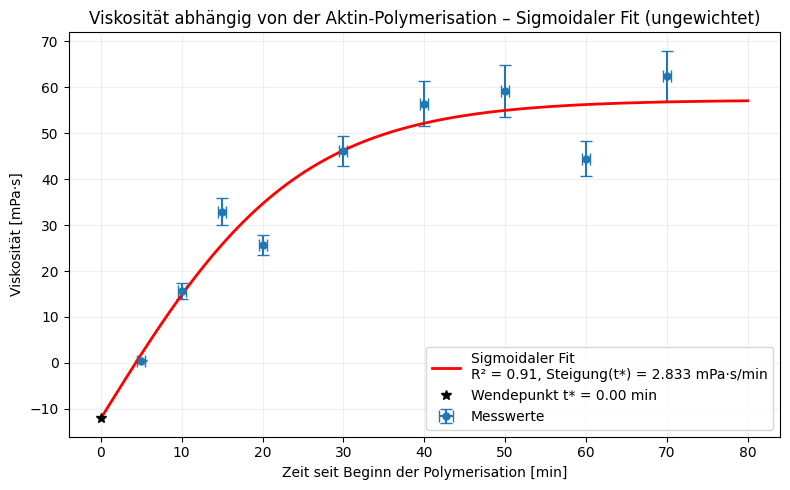


---- Fit-Parameter ----
A   = -81.3908
B   = 57.2535
k   = 0.0817 1/min
t*  = 0.00 min

---- Abgeleitete Größen ----
Steigung bei t* = 2.8330 mPa·s/min

---- Fit-Qualität ----
R²   = 0.9053
RMSE = 6.1425 mPa·s


(array([-8.13907533e+01,  5.72534663e+01,  8.17334205e-02,  8.20511405e-15]),
 8.205114046854431e-15,
 2.8329665744270014)

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sigmoid-Funktion -------------------------------------------------------------
def sigmoid(t, A, B, k, t0):
    return A + (B - A) / (1 + np.exp(-k * (t - t0)))

# Fit-Funktion -----------------------------------------------------------------
def fit_and_plot(df, title="Sigmoidal Fit"):
    
    x = df["Zeit_t0_Messreihe1_min"].to_numpy(float)
    y = df["eta_mPa_s"].to_numpy(float)
    y_err = df["eta_Fehler_mPa_s"].to_numpy(float)
    x_err = df["Zeit_t0_Messreihe1_Fehler_min"].to_numpy(float)

    # Fehler dürfen nie 0 sein (nur für Plot relevant)
    y_err = np.where(y_err == 0, 1e-6, y_err)

    # Startwerte
    A0 = np.min(y)
    B0 = np.max(y)
    k0 = 0.1
    t00 = np.median(x)
    p0 = [A0, B0, k0, t00]

    # Bounds (leicht sinnvoller gefasst)
    lower_bounds = [-np.inf, 0, 0.0, 0]
    upper_bounds = [ np.inf, 200, 1.0, 100]

    # Fit ----------------------------------------------------------------------
    params, cov = curve_fit(
        sigmoid,
        x, y,
        p0=p0,
        bounds=(lower_bounds, upper_bounds),
        maxfev=20000
    )

    A_fit, B_fit, k_fit, t0_fit = params

    # Wendepunkt & Steigung ----------------------------------------------------
    t_star = t0_fit
    slope_star = (B_fit - A_fit) * k_fit / 4

    # Fit-Qualität -------------------------------------------------------------
    y_pred = sigmoid(x, *params)

    SS_res = np.sum((y - y_pred)**2)
    SS_tot = np.sum((y - np.mean(y))**2)
    R2 = 1 - SS_res / SS_tot
    RMSE = np.sqrt(np.mean((y - y_pred)**2))

    # Fitkurve -----------------------------------------------------------------
    t_plot = np.linspace(0, 80, 500)
    y_plot = sigmoid(t_plot, *params)

    # y-Wert am Wendepunkt
    y_star = sigmoid(t_star, *params)

    # Plot ---------------------------------------------------------------------
    plt.figure(figsize=(8,5))

    # Messwerte mit Fehlerbalken (nur Anzeige)
    plt.errorbar(
        x, y,
        xerr=x_err,
        yerr=y_err,
        fmt='o',
        markersize=5,
        capsize=4,
        label="Messwerte"
    )

    # Fitkurve
    fit_label = (
        "Sigmoidaler Fit\n"
        f"R² = {R2:.2f}, "
        f"Steigung(t*) = {slope_star:.3f} mPa·s/min"
    )

    plt.plot(
        t_plot, y_plot,
        "r-", linewidth=2,
        label=fit_label
    )

    # Wendepunkt im Plot markieren
    plt.plot(
        t_star, y_star,
        "k*", markersize=7,
        label=f"Wendepunkt t* = {t_star:.2f} min"
    )

    # Achsenbeschriftungen
    plt.xlabel("Zeit seit Beginn der Polymerisation [min]")
    plt.ylabel("Viskosität [mPa·s]")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

    # Ausgabe in der Konsole ---------------------------------------------------
    print("\n---- Fit-Parameter ----")
    print(f"A   = {A_fit:.4f}")
    print(f"B   = {B_fit:.4f}")
    print(f"k   = {k_fit:.4f} 1/min")
    print(f"t*  = {t_star:.2f} min")

    print("\n---- Abgeleitete Größen ----")
    print(f"Steigung bei t* = {slope_star:.4f} mPa·s/min")

    print("\n---- Fit-Qualität ----")
    print(f"R²   = {R2:.4f}")
    print(f"RMSE = {RMSE:.4f} mPa·s")

    return params, t_star, slope_star

# Aufruf ----------------------------------------------------------------------
fit_and_plot(
    df,
    title="Viskosität abhängig von der Aktin-Polymerisation – Sigmoidaler Fit (ungewichtet)"
)


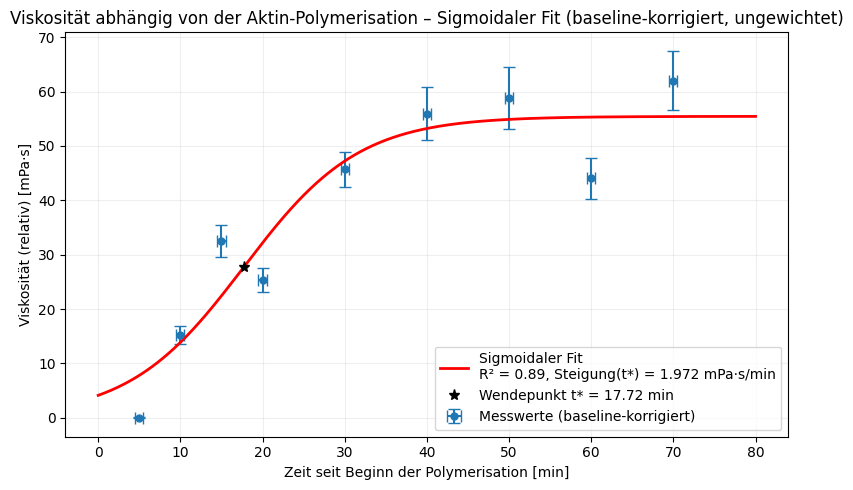


---- Baseline-Korrektur ----
Abgezogene Baseline = 0.4316 mPa·s

---- Fit-Parameter (y0 = 0) ----
B   = 55.4441 mPa·s
k   = 0.1423 1/min
t*  = 17.72 min

---- Abgeleitete Größen ----
Steigung bei t* = 1.9722 mPa·s/min

---- Fit-Qualität ----
R²   = 0.8863
RMSE = 6.7303 mPa·s


(array([55.44413758,  0.1422865 , 17.7175539 ]),
 17.71755390409481,
 1.972238113438205)

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sigmoid ohne Offset (y0 = 0 fix)
def sigmoid0(t, B, k, t0):
    return B / (1 + np.exp(-k * (t - t0)))

def fit_and_plot(df, title="Sigmoidaler Fit (baseline-korrigiert)"):
    
    x = df["Zeit_t0_Messreihe1_min"].to_numpy(float)
    y = df["eta_mPa_s"].to_numpy(float)
    y_err = df["eta_Fehler_mPa_s"].to_numpy(float)
    x_err = df["Zeit_t0_Messreihe1_Fehler_min"].to_numpy(float)

    # ----------------------------
    # Baseline-Korrektur
    # ----------------------------
    y0_baseline = y[0]          # erster Punkt als Referenz
    y_corr = y - y0_baseline    # jetzt startet es bei ~0

    # Fehler dürfen nie 0 sein (nur für Plot)
    y_err = np.where(y_err == 0, 1e-6, y_err)

    # ----------------------------
    # Startwerte
    # ----------------------------
    B0 = np.max(y_corr)
    half = 0.5 * B0
    t0_0 = x[np.argmin(np.abs(y_corr - half))]
    k0 = 0.05
    p0 = [B0, k0, t0_0]

    # ----------------------------
    # Bounds
    # ----------------------------
    lower_bounds = [0.0, 0.0, 0.0]
    upper_bounds = [200.0, 1.0, 100.0]

    # ----------------------------
    # Ungewichteter Fit
    # ----------------------------
    params, cov = curve_fit(
        sigmoid0,
        x, y_corr,
        p0=p0,
        bounds=(lower_bounds, upper_bounds),
        maxfev=20000
    )

    B_fit, k_fit, t0_fit = params

    # ----------------------------
    # Wendepunkt & Steigung
    # ----------------------------
    t_star = t0_fit
    slope_star = B_fit * k_fit / 4.0

    # ----------------------------
    # Fitgüte
    # ----------------------------
    y_pred = sigmoid0(x, *params)
    SS_res = np.sum((y_corr - y_pred)**2)
    SS_tot = np.sum((y_corr - np.mean(y_corr))**2)
    R2 = 1 - SS_res / SS_tot
    RMSE = np.sqrt(np.mean((y_corr - y_pred)**2))

    # ----------------------------
    # Fitkurve
    # ----------------------------
    t_plot = np.linspace(0, 80, 500)
    y_plot = sigmoid0(t_plot, *params)

    # ----------------------------
    # Plot (korrigierte Daten)
    # ----------------------------
    plt.figure(figsize=(8,5))

    plt.errorbar(
        x, y_corr,
        xerr=x_err,
        yerr=y_err,
        fmt='o',
        markersize=5,
        capsize=4,
        label="Messwerte (baseline-korrigiert)"
    )

    plt.plot(
        t_plot, y_plot,
        "r-", linewidth=2,
        label=f"Sigmoidaler Fit\nR² = {R2:.2f}, Steigung(t*) = {slope_star:.3f} mPa·s/min"
    )

    plt.plot(
        t_star, sigmoid0(t_star, *params),
        "k*", markersize=8,
        label=f"Wendepunkt t* = {t_star:.2f} min"
    )

    plt.xlabel("Zeit seit Beginn der Polymerisation [min]")
    plt.ylabel("Viskosität (relativ) [mPa·s]")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

    # ----------------------------
    # Ausgabe
    # ----------------------------
    print("\n---- Baseline-Korrektur ----")
    print(f"Abgezogene Baseline = {y0_baseline:.4f} mPa·s")

    print("\n---- Fit-Parameter (y0 = 0) ----")
    print(f"B   = {B_fit:.4f} mPa·s")
    print(f"k   = {k_fit:.4f} 1/min")
    print(f"t*  = {t_star:.2f} min")

    print("\n---- Abgeleitete Größen ----")
    print(f"Steigung bei t* = {slope_star:.4f} mPa·s/min")

    print("\n---- Fit-Qualität ----")
    print(f"R²   = {R2:.4f}")
    print(f"RMSE = {RMSE:.4f} mPa·s")

    return params, t_star, slope_star

# Aufruf
fit_and_plot(
    df,
    title="Viskosität abhängig von der Aktin-Polymerisation – Sigmoidaler Fit (baseline-korrigiert, ungewichtet)"
)


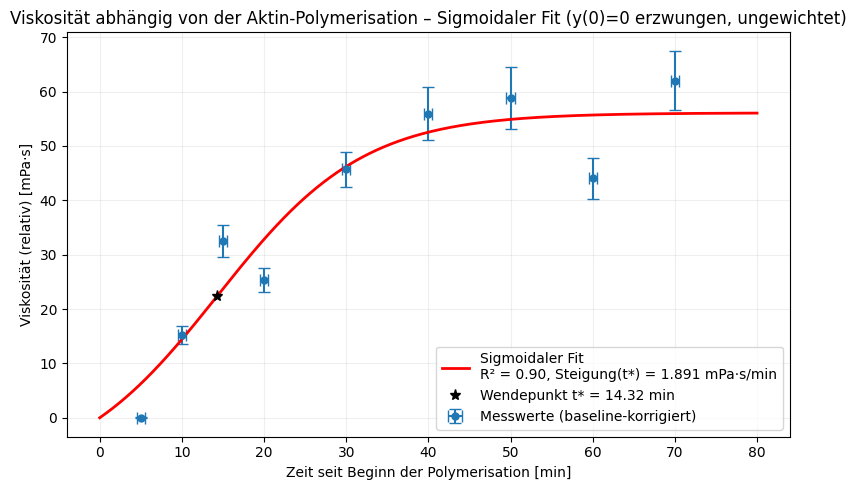


---- Baseline-Korrektur ----
Abgezogene Baseline = 0.4316 mPa·s
Erzwungen: y(0) = 0 (durch Modellverschiebung)

---- Fit-Parameter ----
B   = 67.2933 mPa·s
k   = 0.1124 1/min
t*  = 14.32 min

---- Fit-Qualität ----
R²   = 0.8957
RMSE = 6.4446 mPa·s


(array([67.29334243,  0.1124269 , 14.3217028 ]),
 14.321702804026241,
 1.89139549401423)

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ------------------------------------------------------------
# Sigmoid, so verschoben, dass y(0)=0 gilt
# y(t) = B/(1+exp(-k(t-t0))) - B/(1+exp(k t0))
# ------------------------------------------------------------
def sigmoid_start0(t, B, k, t0):
    return (B / (1.0 + np.exp(-k * (t - t0)))
            - B / (1.0 + np.exp(k * t0)))

def fit_and_plot_start0(df, title="Sigmoid-Fit (erzwingt y(0)=0)"):
    df = df.copy()
    df.columns = df.columns.str.strip()

    x = df["Zeit_t0_Messreihe1_min"].to_numpy(float)
    y = df["eta_mPa_s"].to_numpy(float)
    y_err = df["eta_Fehler_mPa_s"].to_numpy(float)
    x_err = df["Zeit_t0_Messreihe1_Fehler_min"].to_numpy(float)

    # Baseline-Korrektur: Referenz bei erstem Punkt oder (falls du hast) bei t=0 Messung
    y0_baseline = y[0]
    y_corr = y - y0_baseline

    # Fehler nur für Anzeige absichern
    y_err = np.where(y_err == 0, 1e-6, y_err)

    # Startwerte (robust)
    B0 = float(np.max(y_corr))
    half = 0.5 * B0
    t0_0 = float(x[np.argmin(np.abs(y_corr - half))])
    k0 = 0.05
    p0 = [B0, k0, t0_0]

    # Bounds: wichtig, damit es nicht explodiert
    lower_bounds = [0.0, 0.0, 0.0]
    upper_bounds = [200.0, 1.0, 200.0]

    # Fit (ungewichtet)
    params, cov = curve_fit(
        sigmoid_start0,
        x, y_corr,
        p0=p0,
        bounds=(lower_bounds, upper_bounds),
        maxfev=30000
    )

    B_fit, k_fit, t0_fit = params

    # Kennzahlen
    y_pred = sigmoid_start0(x, *params)
    SS_res = np.sum((y_corr - y_pred) ** 2)
    SS_tot = np.sum((y_corr - np.mean(y_corr)) ** 2)
    R2 = 1 - SS_res / SS_tot
    RMSE = np.sqrt(np.mean((y_corr - y_pred) ** 2))

    # "Wendepunkt": beim normalen Sigmoid wäre t0 der Inflektionspunkt,
    # bei der verschobenen Version bleibt die Krümmung identisch -> t0 ist weiterhin sinnvolle Lage.
    t_star = float(t0_fit)

    # Steigung am t0: gleiche wie beim normalen Sigmoid (Shift ist Konstante)
    slope_star = float(B_fit * k_fit / 4.0)

    # Plotkurve
    t_plot = np.linspace(0, 80, 500)
    y_plot = sigmoid_start0(t_plot, *params)

    # Punkt am t0
    y_star = float(sigmoid_start0(t_star, *params))

    # Plot
    plt.figure(figsize=(8, 5))

    plt.errorbar(
        x, y_corr,
        xerr=x_err,
        yerr=y_err,
        fmt='o',
        markersize=5,
        capsize=4,
        label="Messwerte (baseline-korrigiert)"
    )

    plt.plot(
        t_plot, y_plot,
        "r-", linewidth=2,
        label=f"Sigmoidaler Fit\nR² = {R2:.2f}, Steigung(t*) = {slope_star:.3f} mPa·s/min"
    )

    plt.plot(
        t_star, y_star,
        "k*", markersize=8,
        label=f"Wendepunkt t* = {t_star:.2f} min"
    )

    # Achsen
    plt.xlabel("Zeit seit Beginn der Polymerisation [min]")
    plt.ylabel("Viskosität (relativ) [mPa·s]")
    plt.title(title)
    plt.grid(alpha=0.2)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    print("\n---- Baseline-Korrektur ----")
    print(f"Abgezogene Baseline = {y0_baseline:.4f} mPa·s")
    print("Erzwungen: y(0) = 0 (durch Modellverschiebung)")

    print("\n---- Fit-Parameter ----")
    print(f"B   = {B_fit:.4f} mPa·s")
    print(f"k   = {k_fit:.4f} 1/min")
    print(f"t*  = {t_star:.2f} min")

    print("\n---- Fit-Qualität ----")
    print(f"R²   = {R2:.4f}")
    print(f"RMSE = {RMSE:.4f} mPa·s")

    return params, t_star, slope_star

# Aufruf
fit_and_plot_start0(
    df,
    title="Viskosität abhängig von der Aktin-Polymerisation – Sigmoidaler Fit (y(0)=0 erzwungen, ungewichtet)"
)


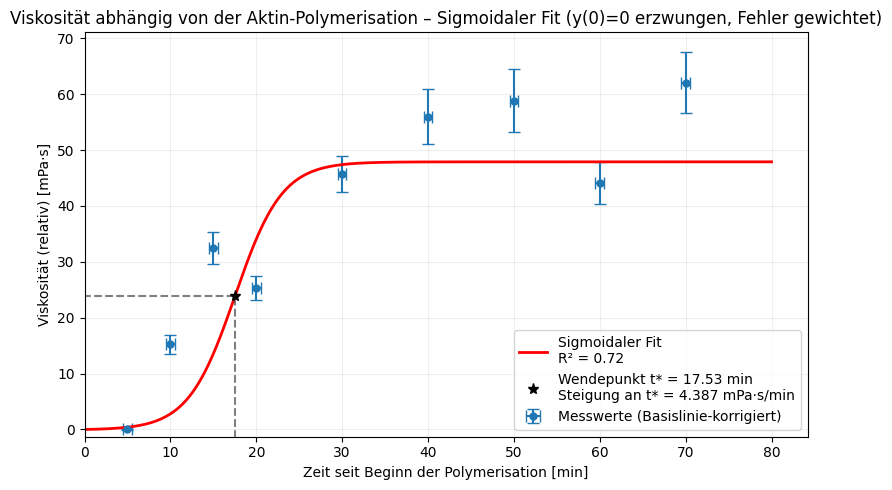


---- Baseline-Korrektur ----
Abgezogene Baseline = 0.4316 mPa·s
Erzwungen: y(0) = 0 (durch Modellverschiebung)

---- Fit-Parameter ----
B   = 47.9730 mPa·s
k   = 0.3658 1/min
t*  = 17.53 min

---- Abgeleitete Größen ----
Steigung bei t* = 4.3870 mPa·s/min

---- Fit-Qualität ----
R²       = 0.7228
RMSE     = 10.5076 mPa·s
Chi²_red = 24.1737


(array([47.9730422 ,  0.3657855 , 17.52957132]),
 17.5295713190594,
 4.386960862229822,
 array([[ 3.75554059e+00, -1.53755501e-02,  6.03776758e-01],
        [-1.53755501e-02,  6.15819652e-04, -7.89471403e-03],
        [ 6.03776758e-01, -7.89471403e-03,  3.03472846e-01]]))

In [170]:
# 0 gewichtet
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ------------------------------------------------------------
# Sigmoid so verschoben, dass y(0)=0 gilt:
# y(t) = B/(1+exp(-k(t-t0))) - B/(1+exp(k t0))
# ------------------------------------------------------------
def sigmoid_start0(t, B, k, t0):
    return (B / (1.0 + np.exp(-k * (t - t0)))
            - B / (1.0 + np.exp(k * t0)))

def fit_and_plot_start0_weighted(df, title="Sigmoid-Fit (y(0)=0, gewichtet)"):
    df = df.copy()
    df.columns = df.columns.str.strip()

    x = df["Zeit_t0_Messreihe1_min"].to_numpy(float)
    y = df["eta_mPa_s"].to_numpy(float)
    y_err = df["eta_Fehler_mPa_s"].to_numpy(float)
    x_err = df["Zeit_t0_Messreihe1_Fehler_min"].to_numpy(float)

    # ----------------------------
    # Baseline-Korrektur (relativ)
    # ----------------------------
    y0_baseline = y[0]          # Referenz (erster Messpunkt)
    y_corr = y - y0_baseline

    # ----------------------------
    # Fehler absichern (nie 0)
    # ----------------------------
    pos = y_err > 0
    fallback = np.nanmedian(y_err[pos]) if np.any(pos) else 1.0
    y_err = np.where(pos, y_err, fallback)

    # Optional: extrem kleine Fehler begrenzen, damit ein Punkt nicht alles dominiert
    # y_err = np.maximum(y_err, np.percentile(y_err, 10))

    # ----------------------------
    # Startwerte
    # ----------------------------
    B0 = float(np.max(y_corr))
    half = 0.5 * B0
    t0_0 = float(x[np.argmin(np.abs(y_corr - half))])
    k0 = 0.05
    p0 = [B0, k0, t0_0]

    # ----------------------------
    # Bounds (stabil)
    # ----------------------------
    lower_bounds = [0.0, 0.0, 0.0]
    upper_bounds = [200.0, 1.0, 200.0]

    # ----------------------------
    # Fit (GEWICHTET)
    # ----------------------------
    params, cov = curve_fit(
        sigmoid_start0,
        x, y_corr,
        p0=p0,
        bounds=(lower_bounds, upper_bounds),
        sigma=y_err,
        absolute_sigma=True,
        maxfev=40000
    )

    B_fit, k_fit, t0_fit = params

    # ----------------------------
    # Fit-Qualität
    # ----------------------------
    y_pred = sigmoid_start0(x, *params)

    SS_res = np.sum((y_corr - y_pred) ** 2)
    SS_tot = np.sum((y_corr - np.mean(y_corr)) ** 2)
    R2 = 1 - SS_res / SS_tot
    RMSE = np.sqrt(np.mean((y_corr - y_pred) ** 2))

    chi2 = np.sum(((y_corr - y_pred) / y_err) ** 2)
    chi2_red = chi2 / max(1, (len(y_corr) - len(params)))

    # ----------------------------
    # Wendepunkt & Steigung
    # ----------------------------
    t_star = float(t0_fit)
    slope_star = float(B_fit * k_fit / 4.0)  # Shift ist konstant -> Ableitung identisch
    y_star = float(sigmoid_start0(t_star, *params))

    # ----------------------------
    # Plot
    # ----------------------------
    t_plot = np.linspace(0, 80, 500)
    y_plot = sigmoid_start0(t_plot, *params)

    plt.figure(figsize=(8, 5))

    plt.errorbar(
        x, y_corr,
        xerr=x_err,
        yerr=y_err,
        fmt='o',
        markersize=5,
        capsize=4,
        label="Messwerte (Basislinie-korrigiert)"
    )

    plt.plot(
    t_plot, y_plot,
    "r-", linewidth=2,
    label=f"Sigmoidaler Fit\nR² = {R2:.2f}"
    )

    plt.plot(
        t_star, y_star,
        "k*", markersize=8,
        label=(
            f"Wendepunkt t* = {t_star:.2f} min\n"
            f"Steigung an t* = {slope_star:.3f} mPa·s/min"
        )
    )

    # Achsgrenzen holen
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()

    # Gestrichelte Linien nur bis zum Wendepunkt
    plt.plot([t_star, t_star], [y_min, y_star], "k--", alpha=0.5)
    plt.plot([x_min, t_star], [y_star, y_star], "k--", alpha=0.5)



    plt.xlabel("Zeit seit Beginn der Polymerisation [min]")
    plt.ylabel("Viskosität (relativ) [mPa·s]")
    plt.title(title)
    plt.grid(alpha=0.2)
    plt.legend(loc="lower right")
    plt.xlim(left=0)
    plt.ylim(bottom=-3 * y0_baseline)  # etwas unter 0 für bessere Sicht
    plt.tight_layout()
    plt.show()

    # ----------------------------
    # Ausgabe
    # ----------------------------
    print("\n---- Baseline-Korrektur ----")
    print(f"Abgezogene Baseline = {y0_baseline:.4f} mPa·s")
    print("Erzwungen: y(0) = 0 (durch Modellverschiebung)")

    print("\n---- Fit-Parameter ----")
    print(f"B   = {B_fit:.4f} mPa·s")
    print(f"k   = {k_fit:.4f} 1/min")
    print(f"t*  = {t_star:.2f} min")

    print("\n---- Abgeleitete Größen ----")
    print(f"Steigung bei t* = {slope_star:.4f} mPa·s/min")

    print("\n---- Fit-Qualität ----")
    print(f"R²       = {R2:.4f}")
    print(f"RMSE     = {RMSE:.4f} mPa·s")
    print(f"Chi²_red = {chi2_red:.4f}")

    return params, t_star, slope_star, cov

# Aufruf
fit_and_plot_start0_weighted(
    df,
    title="Viskosität abhängig von der Aktin-Polymerisation – Sigmoidaler Fit (y(0)=0 erzwungen, Fehler gewichtet)"
)


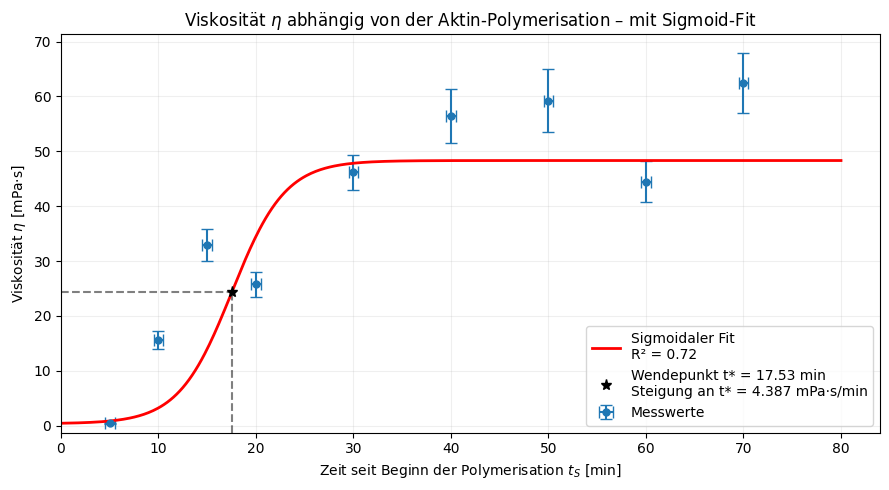


---- Baseline ----
η(0) = 0.4316 mPa·s

---- Fit-Parameter (relatives Modell) ----
B   = 47.9730 mPa·s
k   = 0.3658 1/min
t*  = 17.53 min

---- Abgeleitete Größen ----
Steigung bei t* = 4.3870 mPa·s/min

---- Fit-Qualität (relativ) ----
R²       = 0.7228
RMSE     = 10.5076 mPa·s
Chi²_red = 24.1737


(array([47.9730422 ,  0.3657855 , 17.52957132]),
 array([[ 3.75554059e+00, -1.53755501e-02,  6.03776758e-01],
        [-1.53755501e-02,  6.15819652e-04, -7.89471403e-03],
        [ 6.03776758e-01, -7.89471403e-03,  3.03472846e-01]]))

In [181]:
# Gewichtet, Fit auf relativer Skala, Plot auf absoluter Skala
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ------------------------------------------------------------
# Sigmoid so verschoben, dass y(0)=0 gilt (relatives Modell)
# y(t) = B/(1+exp(-k(t-t0))) - B/(1+exp(k t0))
# ------------------------------------------------------------
def sigmoid_start0(t, B, k, t0):
    return (B / (1.0 + np.exp(-k * (t - t0)))
            - B / (1.0 + np.exp(k * t0)))

def fit_and_plot_absolute(df, title="Sigmoid-Fit (absolut geplottet, relativ gefittet)"):

    df = df.copy()
    df.columns = df.columns.str.strip()

    # Daten laden
    x = df["Zeit_t0_Messreihe1_min"].to_numpy(float)
    y = df["eta_mPa_s"].to_numpy(float)
    y_err = df["eta_Fehler_mPa_s"].to_numpy(float)
    x_err = df["Zeit_t0_Messreihe1_Fehler_min"].to_numpy(float)

    # ----------------------------
    # Baseline (absolute Skala)
    # ----------------------------
    y0_baseline = y[0]

    # Relative Daten für den Fit
    y_corr = y - y0_baseline

    # Fehler absichern
    pos = y_err > 0
    fallback = np.nanmedian(y_err[pos]) if np.any(pos) else 1.0
    y_err = np.where(pos, y_err, fallback)

    # ----------------------------
    # Startwerte
    # ----------------------------
    B0 = float(np.max(y_corr))
    half = 0.5 * B0
    t0_0 = float(x[np.argmin(np.abs(y_corr - half))])
    k0 = 0.05
    p0 = [B0, k0, t0_0]

    # ----------------------------
    # Bounds
    # ----------------------------
    lower_bounds = [0.0, 0.0, 0.0]
    upper_bounds = [200.0, 1.0, 200.0]

    # ----------------------------
    # Fit (GEWICHTET, auf relative Daten)
    # ----------------------------
    params, cov = curve_fit(
        sigmoid_start0,
        x, y_corr,
        p0=p0,
        bounds=(lower_bounds, upper_bounds),
        sigma=y_err,
        absolute_sigma=True,
        maxfev=40000
    )

    B_fit, k_fit, t0_fit = params

    # ----------------------------
    # Fit-Qualität (auf relativer Skala)
    # ----------------------------
    y_pred_rel = sigmoid_start0(x, B_fit, k_fit, t0_fit)

    SS_res = np.sum((y_corr - y_pred_rel) ** 2)
    SS_tot = np.sum((y_corr - np.mean(y_corr)) ** 2)
    R2 = 1 - SS_res / SS_tot
    RMSE = np.sqrt(np.mean((y_corr - y_pred_rel) ** 2))

    chi2 = np.sum(((y_corr - y_pred_rel) / y_err) ** 2)
    chi2_red = chi2 / max(1, (len(y_corr) - len(params)))

    # ----------------------------
    # Wendepunkt & Steigung
    # ----------------------------
    t_star = float(t0_fit)
    slope_star = float(B_fit * k_fit / 4.0)

    # Absolute y-Werte am Wendepunkt
    y_star_abs = y0_baseline + sigmoid_start0(t_star, B_fit, k_fit, t0_fit)

    # ----------------------------
    # Plot auf ABSOLUTER Skala
    # ----------------------------
    t_plot = np.linspace(0, 80, 500)
    y_plot_abs = y0_baseline + sigmoid_start0(t_plot, B_fit, k_fit, t0_fit)

    plt.figure(figsize=(9, 5))

    # Absolute Messwerte
    plt.errorbar(
        x, y,
        xerr=x_err,
        yerr=y_err,
        fmt='o',
        markersize=5,
        capsize=4,
        label="Messwerte"
    )

    # Absolute Fitkurve
    plt.plot(
        t_plot, y_plot_abs,
        "r-", linewidth=2,
        label=f"Sigmoidaler Fit \nR² = {R2:.2f}"
    )

    # Wendepunkt markieren
    plt.plot(
        t_star, y_star_abs,
        "k*", markersize=8,
        label=(
            f"Wendepunkt t* = {t_star:.2f} min\n"
            f"Steigung an t* = {slope_star:.3f} mPa·s/min"
        )
    )

    # Achsen bei 0 starten lassen
    plt.xlim(left=0)
    plt.ylim(bottom=-3 * y0_baseline)  # etwas unter 0 für bessere Sicht

    # Gestrichelte Hilfslinien nur bis zum Wendepunkt
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    plt.plot([t_star, t_star], [y_min, y_star_abs], "k--", alpha=0.5)
    plt.plot([x_min, t_star], [y_star_abs, y_star_abs], "k--", alpha=0.5)

    plt.xlabel(r"Zeit seit Beginn der Polymerisation $t_S$ [min]")
    plt.ylabel(r"Viskosität $\eta$ [mPa·s]")

    plt.title(title)
    plt.grid(alpha=0.2)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # ----------------------------
    # Ausgabe
    # ----------------------------
    print("\n---- Baseline ----")
    print(f"η(0) = {y0_baseline:.4f} mPa·s")

    print("\n---- Fit-Parameter (relatives Modell) ----")
    print(f"B   = {B_fit:.4f} mPa·s")
    print(f"k   = {k_fit:.4f} 1/min")
    print(f"t*  = {t_star:.2f} min")

    print("\n---- Abgeleitete Größen ----")
    print(f"Steigung bei t* = {slope_star:.4f} mPa·s/min")

    print("\n---- Fit-Qualität (relativ) ----")
    print(f"R²       = {R2:.4f}")
    print(f"RMSE     = {RMSE:.4f} mPa·s")
    print(f"Chi²_red = {chi2_red:.4f}")

    return params, cov

# ------------------------------------------------------------
# AUFRUF
# ------------------------------------------------------------
fit_and_plot_absolute(
    df,
    title=r"Viskosität $\eta$ abhängig von der Aktin-Polymerisation – mit Sigmoid-Fit"
)


# Trash bin

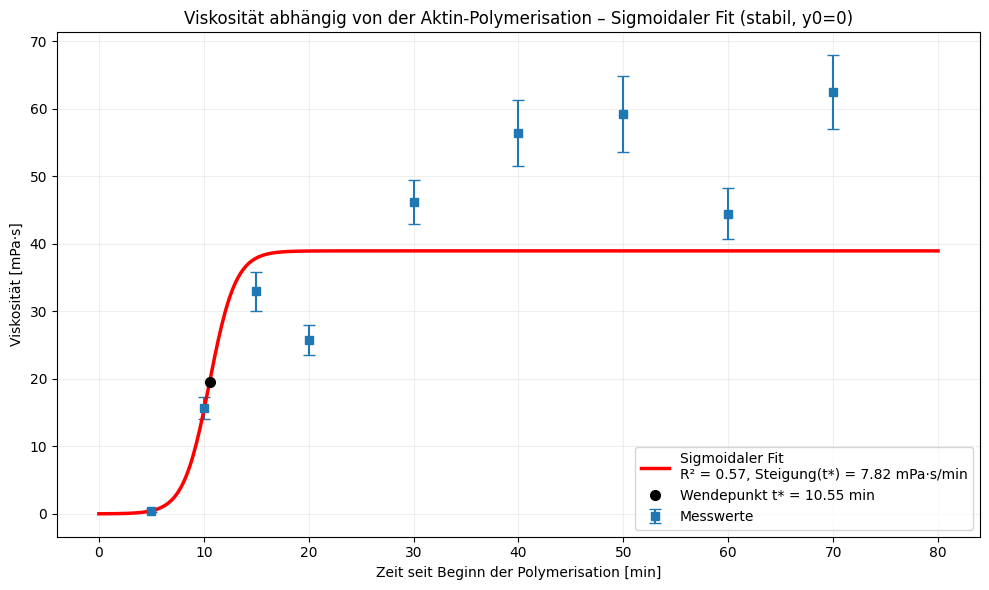


---- Fit-Parameter ----
B   (Plateau) = 38.964 mPa·s
k             = 0.8023 1/min
t*            = 10.55 min

---- Abgeleitet ----
Steigung(t*)  = 7.816 mPa·s/min

---- Fit-Qualität ----
R²   = 0.5676
RMSE = 13.1223 mPa·s


(array([38.96405722,  0.80233348, 10.55092884]),
 10.550928842985813,
 7.815541953623596)

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ------------------------------------------------------------
# 3-Parameter-Sigmoid mit fixierter Baseline y0 = 0
# y(t) = B / (1 + exp(-k*(t - t0)))
# ------------------------------------------------------------
def sigmoid3(t, B, k, t0):
    return B / (1.0 + np.exp(-k * (t - t0)))

# ------------------------------------------------------------
def fit_and_plot(df, title="Sigmoidaler Fit (stabil)"):
    # Spaltennamen säubern
    df = df.copy()
    df.columns = df.columns.str.strip()

    x = df["Zeit_t0_Messreihe1_min"].to_numpy(float)
    y = df["eta_mPa_s"].to_numpy(float)
    y_err = df["eta_Fehler_mPa_s"].to_numpy(float)

    # Fehler absichern
    pos = y_err > 0
    fallback = np.nanmedian(y_err[pos]) if np.any(pos) else 1.0
    y_err = np.where(pos, y_err, fallback)

    # ------------------------------------------------------------
    # Startwerte (SEHR wichtig)
    # Plateau-Schätzer aus späten Punkten
    late = x >= 40
    if np.any(late):
        B0 = float(np.median(y[late]))
    else:
        B0 = float(np.max(y))

    half = 0.5 * B0
    t0_0 = float(x[np.argmin(np.abs(y - half))])
    k0 = 0.05

    p0 = [B0, k0, t0_0]

    # ------------------------------------------------------------
    # Physikalisch sinnvolle Bounds
    lower_bounds = [0,    0.0,   0]
    upper_bounds = [200,  1.0,   200]

    # ------------------------------------------------------------
    params, cov = curve_fit(
        sigmoid3,
        x, y,
        p0=p0,
        bounds=(lower_bounds, upper_bounds),
        sigma=y_err,
        absolute_sigma=True,
        maxfev=20000
    )

    B_fit, k_fit, t0_fit = params

    # ------------------------------------------------------------
    # Wendepunkt & Steigung
    t_star = t0_fit
    slope_star = B_fit * k_fit / 4.0
    y_star = sigmoid3(t_star, *params)

    # ------------------------------------------------------------
    # Fitgüte
    y_pred = sigmoid3(x, *params)
    SS_res = np.sum((y - y_pred) ** 2)
    SS_tot = np.sum((y - np.mean(y)) ** 2)
    R2 = 1 - SS_res / SS_tot
    RMSE = np.sqrt(np.mean((y - y_pred) ** 2))

    # ------------------------------------------------------------
    # Plot
    t_plot = np.linspace(0, 80, 500)
    y_plot = sigmoid3(t_plot, *params)

    plt.figure(figsize=(10, 6))

    plt.errorbar(
        x, y,
        yerr=y_err,
        fmt='s',
        markersize=6,
        capsize=4,
        elinewidth=1.5,
        label="Messwerte"
    )

    plt.plot(
        t_plot, y_plot,
        "r-", linewidth=2.5,
        label=f"Sigmoidaler Fit\nR² = {R2:.2f}, Steigung(t*) = {slope_star:.2f} mPa·s/min"
    )

    plt.plot(
        t_star, y_star,
        "ko", markersize=7,
        label=f"Wendepunkt t* = {t_star:.2f} min"
    )

    plt.xlabel("Zeit seit Beginn der Polymerisation [min]")
    plt.ylabel("Viskosität [mPa·s]")
    plt.title(title)
    plt.grid(alpha=0.2)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # ------------------------------------------------------------
    print("\n---- Fit-Parameter ----")
    print(f"B   (Plateau) = {B_fit:.3f} mPa·s")
    print(f"k             = {k_fit:.4f} 1/min")
    print(f"t*            = {t_star:.2f} min")

    print("\n---- Abgeleitet ----")
    print(f"Steigung(t*)  = {slope_star:.3f} mPa·s/min")

    print("\n---- Fit-Qualität ----")
    print(f"R²   = {R2:.4f}")
    print(f"RMSE = {RMSE:.4f} mPa·s")

    return params, t_star, slope_star

# ------------------------------------------------------------
# AUFRUF
# ------------------------------------------------------------
fit_and_plot(
    df,
    title="Viskosität abhängig von der Aktin-Polymerisation – Sigmoidaler Fit (stabil, y0=0)"
)
